# [리스트]
## 1. 전세가율
## 2. 입주물량
## 3. 국토부 미분양
## 4. 중년 주택 가치 흐름
## 5. 리딩 단지 시세 추이
## 6. 주택 순환주기

In [1]:
from datetime import datetime, timedelta
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.graph_objects as go

import webbrowser

# 오류창 제거
import warnings
warnings.filterwarnings(action='ignore')

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

# 마이너스 기호(-) 깨짐 방지
matplotlib.rcParams['axes.unicode_minus'] = False

#오늘 저장
now = datetime.now()

#열최대개수
pd.set_option('display.max_columns', None)                      # 출력할 열의 최대개수
pd.set_option('display.max_rows', 40)                      # 출력할 열의 최대개수
pd.set_option('display.max_colwidth', None)                      # 출력할 열의 너비

### 1. 전세가율
        : 해당 지역에 실수요가 풍부한지는 전세가율을 통해 알 수 있다. 
        실수요가 많을수록 전세가가 올라가고, 따라서 전세가율은 높아진다.
        → 전세가율이 적어도 70%를 넘는가?
        → 80%를 상회할 경우 실수요 압력(전세 → 매매 전환)매우 우수

In [2]:
from PublicDataReader import Kbland
api = Kbland()
params = {
    "매물종별구분": "01",
    "기간": "10"
}
df_jeonse_price_ratio = api.get_jeonse_price_ratio(**params)
df_jeonse_price_ratio.rename(columns= {'전세가격비율':'전세가격비율[%]'}, inplace=True)
df_jeonse_price_ratio.tail(1)

,매물종별구분,지역코드,지역명,날짜,전세가격비율[%]
2903,아파트,5100000000,강원특별자치도,2023-07-01,75.483427


# [시각화]

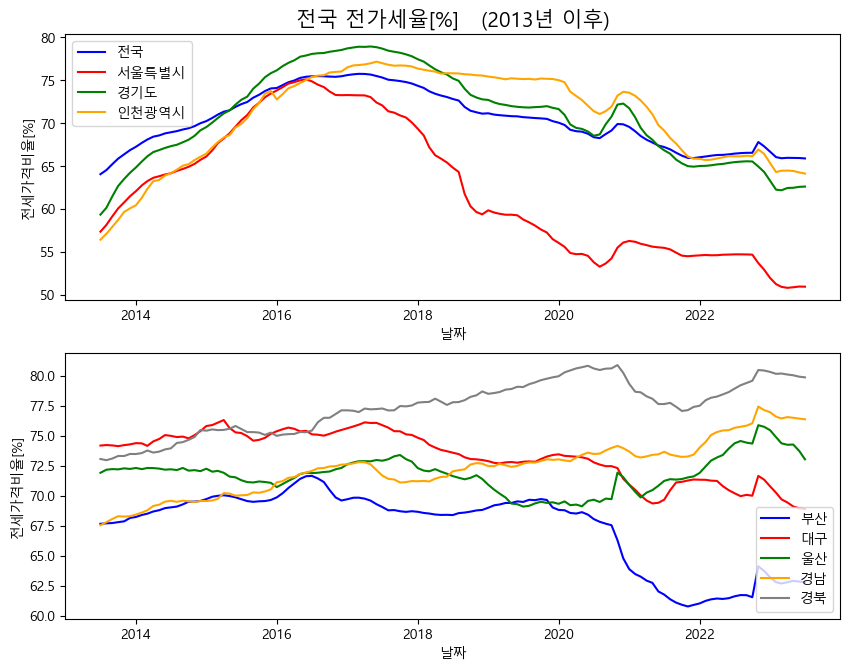

In [5]:
fig=plt.figure(figsize=(10,20))

plt.subplot(511)
sns.lineplot(x='날짜', y='전세가격비율[%]', data=df_jeonse_price_ratio[df_jeonse_price_ratio['지역명']=='전국'], color = 'blue', label = '전국')
sns.lineplot(x='날짜', y='전세가격비율[%]', data=df_jeonse_price_ratio[df_jeonse_price_ratio['지역명']=='서울특별시'], color = 'red', label = '서울특별시')
sns.lineplot(x='날짜', y='전세가격비율[%]', data=df_jeonse_price_ratio[df_jeonse_price_ratio['지역명']=='경기도'], color = 'green', label = '경기도')
sns.lineplot(x='날짜', y='전세가격비율[%]', data=df_jeonse_price_ratio[df_jeonse_price_ratio['지역명']=='인천광역시'], color = 'orange', label = '인천광역시')
# plt.axhline(Avg_jeonse_price_ratio['전국'], color = 'blue', linestyle=':')
# plt.axhline(Avg_jeonse_price_ratio['서울특별시'], color = 'red', linestyle=':')
# plt.axhline(Avg_jeonse_price_ratio['경기도'], color = 'green', linestyle=':')
# plt.axhline(Avg_jeonse_price_ratio['인천광역시'], color = 'orange', linestyle=':')
plt.legend(loc='upper left')
plt.title('전국 전가세율[%]   (2013년 이후)', fontsize = 15)

plt.subplot(512)
sns.lineplot(x='날짜', y='전세가격비율[%]', data=df_jeonse_price_ratio[df_jeonse_price_ratio['지역명']=='부산광역시'], color = 'blue', label = '부산')
sns.lineplot(x='날짜', y='전세가격비율[%]', data=df_jeonse_price_ratio[df_jeonse_price_ratio['지역명']=='대구광역시'], color = 'red', label = '대구')
sns.lineplot(x='날짜', y='전세가격비율[%]', data=df_jeonse_price_ratio[df_jeonse_price_ratio['지역명']=='울산광역시'], color = 'green', label = '울산')
sns.lineplot(x='날짜', y='전세가격비율[%]', data=df_jeonse_price_ratio[df_jeonse_price_ratio['지역명']=='경상남도'], color = 'orange', label = '경남')
sns.lineplot(x='날짜', y='전세가격비율[%]', data=df_jeonse_price_ratio[df_jeonse_price_ratio['지역명']=='경상북도'], color = 'gray', label = '경북')
# plt.axhline(Avg_jeonse_price_ratio['부산광역시'], color = 'blue', linestyle=':')
# plt.axhline(Avg_jeonse_price_ratio['대구광역시'], color = 'red', linestyle=':')
# plt.axhline(Avg_jeonse_price_ratio['울산광역시'], color = 'green', linestyle=':')
# plt.axhline(Avg_jeonse_price_ratio['경상남도'], color = 'orange', linestyle=':')
# plt.axhline(Avg_jeonse_price_ratio['경상북도'], color = 'gray', linestyle=':')
# plt.legend(loc='upper left')

# plt.subplot(513)
# sns.lineplot(x='날짜', y='전세가격비율[%]', data=df_jeonse_price_ratio[df_jeonse_price_ratio['지역명']=='부산광역시'], color = 'blue', label = '부산')
# sns.lineplot(x='날짜', y='전세가격비율[%]', data=df_jeonse_price_ratio[df_jeonse_price_ratio['지역명']=='대구광역시'], color = 'red', label = '대구')
# sns.lineplot(x='날짜', y='전세가격비율[%]', data=df_jeonse_price_ratio[df_jeonse_price_ratio['지역명']=='울산광역시'], color = 'green', label = '울산')
# sns.lineplot(x='날짜', y='전세가격비율[%]', data=df_jeonse_price_ratio[df_jeonse_price_ratio['지역명']=='경상남도'], color = 'orange', label = '경남')
# sns.lineplot(x='날짜', y='전세가격비율[%]', data=df_jeonse_price_ratio[df_jeonse_price_ratio['지역명']=='경상북도'], color = 'gray', label = '경북')
# plt.axhline(Avg_jeonse_price_ratio['부산광역시'], color = 'blue', linestyle=':')
# plt.axhline(Avg_jeonse_price_ratio['대구광역시'], color = 'red', linestyle=':')
# plt.axhline(Avg_jeonse_price_ratio['울산광역시'], color = 'green', linestyle=':')
# plt.axhline(Avg_jeonse_price_ratio['경상남도'], color = 'orange', linestyle=':')
# plt.axhline(Avg_jeonse_price_ratio['경상북도'], color = 'gray', linestyle=':')
# plt.legend(loc='upper left')


# plt.subplot(514)
# sns.lineplot(x='날짜', y='전세가격비율[%]', data=df_jeonse_price_ratio[df_jeonse_price_ratio['지역명']=='광주광역시'], color = 'blue', label = '광주')
# sns.lineplot(x='날짜', y='전세가격비율[%]', data=df_jeonse_price_ratio[df_jeonse_price_ratio['지역명']=='전라남도'], color = 'red', label = '전남')
# sns.lineplot(x='날짜', y='전세가격비율[%]', data=df_jeonse_price_ratio[df_jeonse_price_ratio['지역명']=='전라북도'], color = 'green', label = '전북')
# plt.axhline(Avg_jeonse_price_ratio['광주광역시'], color = 'blue', linestyle=':')
# plt.axhline(Avg_jeonse_price_ratio['전라남도'], color = 'red', linestyle=':')
# plt.axhline(Avg_jeonse_price_ratio['전라북도'], color = 'green', linestyle=':')
# plt.legend(loc='upper left')


# plt.subplot(515)
# sns.lineplot(x='날짜', y='전세가격비율[%]', data=df_jeonse_price_ratio[df_jeonse_price_ratio['지역명']=='대전광역시'], color = 'blue', label = '대전')
# sns.lineplot(x='날짜', y='전세가격비율[%]', data=df_jeonse_price_ratio[df_jeonse_price_ratio['지역명']=='충청남도'], color = 'red', label = '충남')
# sns.lineplot(x='날짜', y='전세가격비율[%]', data=df_jeonse_price_ratio[df_jeonse_price_ratio['지역명']=='충청북도'], color = 'green', label = '충북')
# sns.lineplot(x='날짜', y='전세가격비율[%]', data=df_jeonse_price_ratio[df_jeonse_price_ratio['지역명']=='강원도'], color = 'orange', label = '강원')
# plt.axhline(Avg_jeonse_price_ratio['대전광역시'], color = 'blue', linestyle=':')
# plt.axhline(Avg_jeonse_price_ratio['충청남도'], color = 'red', linestyle=':')
# plt.axhline(Avg_jeonse_price_ratio['충청북도'], color = 'green', linestyle=':')
# plt.axhline(Avg_jeonse_price_ratio['강원도'], color = 'orange', linestyle=':')
# plt.legend(loc='upper left')


plt.show()

### 2. 입주물량

In [8]:
pip install tqdm

                                              0.0/77.1 kB ? eta -:--:--
     ---------------------------------------- 77.1/77.1 kB 4.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: C:\Users\서진영\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [9]:
from PublicDataReader import HousingLicense
import PublicDataReader as pdr
from tqdm import tqdm
import time

service_key = "m%2BPqC7Ztq1Mtd%2B5Cg8TgynTKW2%2BI%2FLArkK2UkYbhmQSwc3GAS4FFMcRZGtdP7rs%2Fw4HKZNiIzNVvx5w8lR%2FiIQ%3D%3D"
api = HousingLicense(service_key)

In [10]:
code = pd.read_csv('./data/법정동코드.csv', encoding = 'euc-kr')
code = code.loc[code['폐지여부'] == '존재']
code['법정동코드'] = code['법정동코드'].astype("string")
code['시군구코드'] = code['법정동코드'].astype("string")
code['읍면동코드'] = code['시군구코드'].str[5:]
code['시군구코드'] = code['시군구코드'].str[:5]
code = code[code['읍면동코드'] != '00000']

#### 1) 신규 연간 입주 물량(2023~)

In [11]:
import webbrowser
webbrowser.open("https://www.reb.or.kr/r-one/na/ntt/selectNttInfo.do?mi=10224&bbsId=1264&nttSn=81136")

True

In [26]:
df = pd.read_csv('./data/입주예정물량_공개용.csv', encoding = 'euc-kr')
# df = df.groupby('지역')
# df.loc[df.shape[0]+1] = df['세대수'].sum()
# df = df.rename(index={df.shape[0]: '전국'})

In [29]:
df.tail()

,연도,입주예정월,지역,시군구,사업유형,주소,주택명,세대수
1224,2024,12,경기,고양시 덕양구,조합,경기도 고양시 덕양구 고양동 22-2,고양동1-1,352
1225,2024,12,강원,원주시,분양,강원도 원주시 관설동 1426-0,초혁신도시 반도유보라 마크브릿지,476
1226,2024,12,강원,속초시,분양,강원도 속초시 장사동 649-12,속초 헤리엇 THE 228,228
1227,2024,12,강원,강릉시,분양,강원도 강릉시 지변동 673-1,강릉 더리브 퍼스티지,176
1228,2024,12,강원,강릉시,분양,강원도 강릉시 주문진읍 교항리 244-7,삼부르네상스 오션포레,234


In [36]:
df['사업유형'].unique()

array(['임대', '조합', '분양', '리모델링'], dtype=object)

In [45]:
df.pivot_table(index=[ '연도','지역','시군구'], values='세대수').head(10)

세대수
연도   지역 시군구            
2023 강원 강릉시  231.500000
        동해시  431.000000
        삼척시  166.000000
        속초시  328.000000
        영월군   70.000000
        원주시  642.166667
        정선군  161.000000
        춘천시  402.000000
        태백시  189.000000
        평창군  190.500000

In [23]:
df.tail(1)

,연도,입주예정월,지역,시군구,사업유형,주소,주택명,세대수
1092,2024,9,세종,세종특별자치시,분양,세종특별자치시 조치원읍 봉산리 379-0,엘리프 세종,660
1149,2024,11,전남,순천시,분양,전라남도 순천시 조례동 161-10,트리마제 순천 2단지,705
1175,2024,12,충북,제천시,분양,충청북도 제천시 장락동 469-7,e편한세상 제천 더프라임,630
1177,2024,12,충남,천안시서북구,분양,충청남도 천안시 서북구 백석동 76-50,포레나 천안노태(2단지),777
1178,2024,12,제주,제주시,분양,제주특별자치도 제주시 애월읍 광령리 2680-0,제주 더 힐 테라스,200
1181,2024,12,전북,익산시,분양,전라북도 익산시 남중동 112-11,광신프로그레스 더센트로,541
1184,2024,12,인천,미추홀구,분양,인천광역시 미추홀구 학익동 0-0,시티오씨엘 3단지,977
1185,2024,12,울산,울주군,분양,울산광역시 울주군 온양읍 발리 440-0,신일 해피트리 더 루츠,848
1187,2024,12,서울,은평구,조합,"서울특별시 은평구 대조동 88, 89",대조제1,2451
1190,2024,12,부산,기장군,분양,부산광역시 기장군 기장읍 연화리 294-0,쌍용 더 플래티넘 오시리아,191


In [148]:
df.tail()

,연도,입주예정월,세대수
지역,,,
전북,49573.5,170.0,10339.5
제주,32373.5,98.5,1668.0
충남,77898.0,251.0,25329.5
충북,34398.5,117.0,13738.0
전국,397911.0,397911.0,397911.0


#### 2) 장기 연평균 입주 물량

In [149]:
from PublicDataReader import Kosis

# KOSIS 공유서비스 Open API 사용자 인증키
service_key = "ZGYxYzIzN2UyOTk1Nzg3ZTdlYjFjMTA0NTRlYTZlYzY="

# 인스턴스 생성하기
api = Kosis(service_key)

In [189]:
df_Licensing_year = api.get_data(
    "통계자료",
    orgId="116",
    tblId="DT_MLTM_626",
    objL1="ALL",
    objL2="ALL",
    objL3 ="ALL",
    itmId="ALL",
    prdSe="M",
    startPrdDe="200901",
    endPrdDe="202312"
)
df_Licensing_year.replace('총  계', '총계', inplace=True)

In [190]:
df_Licensing = df_Licensing_year
col_list = ['통계표명','수록시점','분류값명1','분류값명3','수치값']
df_Licensing = df_Licensing[col_list]

df_Licensing['수록시점'] = pd.to_datetime(df_Licensing['수록시점'], format="%Y")
df_Licensing['수치값'] = pd.to_numeric(df_Licensing['수치값'])
df_Licensing = df_Licensing[df_Licensing['분류값명1']=='총계'].groupby('분류값명3').sum('수치값')/13
df_Licensing.head(1)

,수치값
분류값명3,
강원,17758.769231


#### 1) + 2)

In [158]:
result = pd.merge(df_Licensing, df,  how='left', left_on=df_Licensing.index, right_on=df.index)
result['장기 연평균 대비 신규 입주 물량[%]'] = result['세대수']/result['수치값']*100
result.columns = ['지역', '연평균 입주 물량', '연도', '입주예정월', '세대수', '장기 연평균 대비 신규 입주 물량[%]']
result.head(1)

,지역,연평균 입주 물량,연도,입주예정월,세대수,장기 연평균 대비 신규 입주 물량[%]
0,강원,17758.769231,51598.0,168.0,9790.5,55.13051


#### 3) 지역별 주택 수

In [162]:
df_House = api.get_data(
    "통계자료",
    orgId="116",
    tblId="DT_MLTM_2100",
    objL1="ALL",
    itmId="ALL",
    prdSe="M",
    startPrdDe="200901",
    endPrdDe="202312"
)

df_House['수치값'] = pd.to_numeric(df_House['수치값'])*1000
df_House = df_House[(df_House['수록시점']=='2021') & (df_House['항목명']=='가구수(등록센서스)')][['통계표명', '분류값명1', '항목명', '수치값']]

In [163]:
result2 = pd.merge(result, df_House,  how='left', left_on=result['지역'], right_on=df_House['분류값명1'])
result2['지역 가구 수 대비 신규 입주 물량[%]'] = result2['세대수']*2/result2['수치값']*100

In [164]:
result2.head()

,key_0,지역,연평균 입주 물량,연도,입주예정월,세대수,장기 연평균 대비 신규 입주 물량[%],통계표명,분류값명1,항목명,수치값,지역 가구 수 대비 신규 입주 물량[%]
0,강원,강원,17758.769231,51598.0,168.0,9790.5,55.130510,(新)주택보급률,강원,가구수(등록센서스),674700.0,2.902179
1,경기,경기,171552.692308,349040.5,1078.5,128924.0,75.151254,(新)주택보급률,경기,가구수(등록센서스),5290700.0,4.873608
2,경남,경남,34731.230769,68799.0,219.5,19740.0,56.836454,(新)주택보급률,경남,가구수(등록센서스),1379000.0,2.862944
3,경북,경북,27135.923077,52612.5,177.5,19027.0,70.117386,(新)주택보급률,경북,가구수(등록센서스),1156600.0,3.290161
4,광주,광주,13625.153846,33388.5,88.5,9541.0,70.024897,(新)주택보급률,광주,가구수(등록센서스),615700.0,3.099237


In [177]:
X_risk = (result2['장기 연평균 대비 신규 입주 물량[%]'].max() + result2['장기 연평균 대비 신규 입주 물량[%]'].min())*2/3
X_safe = (result2['장기 연평균 대비 신규 입주 물량[%]'].max() + result2['장기 연평균 대비 신규 입주 물량[%]'].min())*1/3
y_risk = (result2['지역 가구 수 대비 신규 입주 물량[%]'].max() + result2['지역 가구 수 대비 신규 입주 물량[%]'].min())*2/3
y_safe = (result2['지역 가구 수 대비 신규 입주 물량[%]'].max() + result2['지역 가구 수 대비 신규 입주 물량[%]'].min())*1/3

posx and posy should be finite values
posx and posy should be finite values


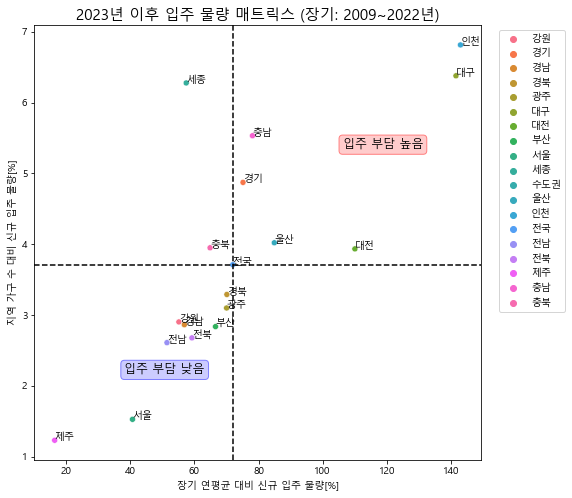

In [188]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='장기 연평균 대비 신규 입주 물량[%]', y='지역 가구 수 대비 신규 입주 물량[%]' , data=result2, hue='지역')
plt.axhline(round(result2[result2['지역']=='전국']['지역 가구 수 대비 신규 입주 물량[%]'].item(),1), c='black', ls='--')
plt.axvline(round(result2[result2['지역']=='전국']['장기 연평균 대비 신규 입주 물량[%]'].item(),1), c='black', ls='--')

for i, txt in enumerate(result2['지역 가구 수 대비 신규 입주 물량[%]']):
    plt.text(result2['장기 연평균 대비 신규 입주 물량[%]'][i],txt,result2['지역'][i])

plt.text(X_safe-15, y_safe-.5, '입주 부담 낮음',
         bbox=dict(boxstyle="round",
                   ec=(0.5, 0.5, 1.0),
                   fc=(0.8, 0.8, 1.0),),
         fontsize = 12
        )
plt.text(X_risk, y_risk, '입주 부담 높음',
         bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),),
         fontsize = 12
        )
    
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.title('2023년 이후 입주 물량 매트릭스 (장기: 2009~2022년)', fontsize = 15)
plt.show()

### 3. 국토부 미분양

#### 1) 시군구별 미분양 현황

In [46]:
from PublicDataReader import Kosis

# KOSIS 공유서비스 Open API 사용자 인증키
service_key = "ZGYxYzIzN2UyOTk1Nzg3ZTdlYjFjMTA0NTRlYTZlYzY="

# 인스턴스 생성하기
api = Kosis(service_key)

In [61]:
df_unsold_2022 = pd.DataFrame([])

for i in range(202301, 202313):
    df_unsold = api.get_data(
    "통계자료",
    orgId="116",
    tblId="DT_MLTM_2082",
    objL1="ALL",
    objL2="ALL",
    itmId="ALL",
    prdSe="M",
    startPrdDe=str(i),
    endPrdDe=str(i)
    )
    df_unsold_2022 = pd.concat([df_unsold_2022, df_unsold])

df_unsold_2022.tail(1)

TypeError: Reb.get_data() missing 1 required positional argument: 'category_name'

In [48]:
df_unsold_2022.rename(columns = {'분류값명1' : '공급지역명',
                                '수치값' : '미분양'}, inplace = True)
df_unsold_2022['미분양'] = df_unsold_2022['미분양'].astype('int')
df_unsold_2022_max = df_unsold_2022[df_unsold_2022['분류값명2'] == '계']
df_unsold_2022_max = df_unsold_2022_max[df_unsold_2022_max['수록시점'] == df_unsold_2022_max['수록시점'].max()]

#### 2) 청약경쟁률

In [49]:
# 한국부동산원 부동산 종합 정보 조회 클래스 임포트하기
from PublicDataReader import Reb

# 공공 데이터 포털 오픈 API 서비스 인증키 입력하기
service_key = "m%2BPqC7Ztq1Mtd%2B5Cg8TgynTKW2%2BI%2FLArkK2UkYbhmQSwc3GAS4FFMcRZGtdP7rs%2Fw4HKZNiIzNVvx5w8lR%2FiIQ%3D%3D"

# 데이터 조회 API 인스턴스 정의하기
api = Reb(service_key)

##### ① 청약 정보

In [50]:
service_name = "분양정보"

category_list = list(api.meta_dict[service_name].keys())
it = iter(category_list)
print(f"{service_name} 카테고리 목록")
print(", ".join(category_list))

분양정보 카테고리 목록
아파트, 오피스텔, 아파트잔여, 아파트주택형별, 오피스텔주택형별, 아파트잔여주택형별


In [51]:
category_name = next(it)
print(f"카테고리명: {category_name}")

df_Subscription_info = api.get_data(
    service_name, 
    category_name,
    verbose=True,
    )
df_Subscription_info.tail(1)

카테고리명: 아파트
total_count: 1614, match_count: 1614, cumulative_count: 1614


,BSNS_MBY_NM,CNSTRCT_ENTRPS_NM,CNTRCT_CNCLS_BGNDE,CNTRCT_CNCLS_ENDDE,GNRL_RNK1_CRSPAREA_RCEPT_PD,GNRL_RNK1_ETC_AREA_RCPTDE_PD,GNRL_RNK1_ETC_GG_RCPTDE_PD,GNRL_RNK2_CRSPAREA_RCEPT_PD,GNRL_RNK2_ETC_AREA_RCPTDE_PD,GNRL_RNK2_ETC_GG_RCPTDE_PD,HMPG_ADRES,HOUSE_DTL_SECD,HOUSE_DTL_SECD_NM,HOUSE_MANAGE_NO,HOUSE_NM,HOUSE_SECD,HOUSE_SECD_NM,HSSPLY_ADRES,HSSPLY_ZIP,IMPRMN_BSNS_AT,LRSCL_BLDLND_AT,MDAT_TRGET_AREA_SECD,MDHS_TELNO,MVN_PREARNGE_YM,NPLN_PRVOPR_PUBLIC_HOUSE_AT,PARCPRC_ULS_AT,PBLANC_NO,PBLANC_URL,PRZWNER_PRESNATN_DE,PUBLIC_HOUSE_EARTH_AT,RCEPT_BGNDE,RCEPT_ENDDE,RCRIT_PBLANC_DE,RENT_SECD,RENT_SECD_NM,SPECLT_RDN_EARTH_AT,SPSPLY_RCEPT_BGNDE,SPSPLY_RCEPT_ENDDE,SUBSCRPT_AREA_CODE,SUBSCRPT_AREA_CODE_NM,TOT_SUPLY_HSHLDCO
1613,롯데건설(주),롯데건설(주),2020-04-22,2020-04-24,2020-03-30,2020-03-31,None,2020-04-01,2020-04-01,None,http://www.lottecastle.co.kr,01,민영,2020000312,르엘 신반포,01,APT,서울특별시 서초구 잠원동 74번지 외 1필지,06509,Y,N,Y,18118448,202212,N,N,2020000312,https://www.applyhome.co.kr/ai/aia/selectAPTLttotPblancDetail.do?houseManageNo=2020000312&pblancNo=2020000312,2020-04-09,N,2020-03-30,2020-04-01,2020-03-20,0,분양주택,Y,None,None,100,서울,67


In [52]:
df_Subscription_info.rename(columns = {'HOUSE_MANAGE_NO' : '주택관리번호',
'PBLANC_NO' : '공고번호',
'HOUSE_NM' : '주택명',
'HOUSE_SECD' : '주택구분코드',
'HOUSE_SECD_NM' : '주택구분코드명',
'HOUSE_DTL_SECD' : '주택상세구분코드',
'HOUSE_DTL_SECD_NM' : '주택상세구분코드명',
'RENT_SECD' : '분양구분코드',
'RENT_SECD_NM' : '분양구분코드명',
'SUBSCRPT_AREA_CODE' : '공급지역코드',
'SUBSCRPT_AREA_CODE_NM' : '공급지역명',
'HSSPLY_ZIP' : '공급위치 우편번호',
'HSSPLY_ADRES' : '공급위치',
'TOT_SUPLY_HSHLDCO' : '공급규모',
'RCRIT_PBLANC_DE' : '모집공고일',
'RCEPT_BGNDE' : '청약접수시작일',
'RCEPT_ENDDE' : '청약접수종료일',
'SPSPLY_RCEPT_BGNDE' : '특별공급 접수시작일',
'SPSPLY_RCEPT_ENDDE' : '특별공급 접수종료일',
'GNRL_RNK1_CRSPAREA_RCEPT_PD' : '1순위 접수일 해당지역',
'GNRL_RNK1_ETC_GG_RCPTDE_PD' : '1순위 접수일 경기지역',
'GNRL_RNK1_ETC_AREA_RCPTDE_PD' : '1순위 접수일 기타지역',
'GNRL_RNK2_CRSPAREA_RCEPT_PD' : '2순위 접수일 해당지역',
'GNRL_RNK2_ETC_GG_RCPTDE_PD' : '2순위 접수일 경기지역',
'GNRL_RNK2_ETC_AREA_RCPTDE_PD' : '2순위 접수일 기타지역',
'PRZWNER_PRESNATN_DE' : '당첨자발표일',
'CNTRCT_CNCLS_BGNDE' : '계약시작일',
'CNTRCT_CNCLS_ENDDE' : '계약종료일',
'HMPG_ADRES' : '홈페이지주소',
'CNSTRCT_ENTRPS_NM' : '건설업체명 (시공사)',
'MDHS_TELNO' : '문의처',
'BSNS_MBY_NM' : '사업주체명 (시행사)',
'MVN_PREARNGE_YN' : '입주예정월',
'SPECLT_RDN_EARTH_AT' : '투기과열지구',
'MDAT_TRGET_AREA_SECD' : '조정대상지역',
'PARCPRC_ULS_AT' : '분양가상한제',
'IMPRMN_BSNS_AT' : '정비사업',
'PUBLIC_HOUSE_EARTH_AT' : '공공주택지구',
'LRSCL_BLDLND_AT' : '대규모 택지개발지구',
'NPLN_PRVOPR_PUBLIC_HOUSE_AT' : '수도권 내 민영 공공주택지구',
'PBLANC_URL' : '분양정보 URL',
                                      'MVN_PREARNGE_YM' : '입주예정월',
'SEARCH_HOUSE_SECD' : '주택구분',
'SUBSCRPT_RCEPT_BGNDE' : '청약접수시작일',
'SUBSCRPT_RCEPT_ENDDE' : '청약접수종료일'}, inplace = True)


##### ② 청약 경쟁률

In [53]:
# 공공 데이터 포털 오픈 API 서비스 인증키 입력하기
service_key = "m%2BPqC7Ztq1Mtd%2B5Cg8TgynTKW2%2BI%2FLArkK2UkYbhmQSwc3GAS4FFMcRZGtdP7rs%2Fw4HKZNiIzNVvx5w8lR%2FiIQ%3D%3D"

# 데이터 조회 API 인스턴스 정의하기
api = Reb(service_key)

In [54]:
service_name = "청약경쟁률"

category_list = list(api.meta_dict[service_name].keys())
it = iter(category_list)
print(f"{service_name} 카테고리 목록")
print(", ".join(category_list))

청약경쟁률 카테고리 목록
아파트, 오피스텔, 임대, 취소후재공급, 잔여


In [55]:
category_name = next(it)
print(f"카테고리명: {category_name}")

df_Subscription_cr = api.get_data(
    service_name, 
    category_name,
    verbose=True,
    )
df_Subscription_cr.tail(1)

카테고리명: 아파트
total_count: 32476, match_count: 32476, cumulative_count: 10000
total_count: 32476, match_count: 32476, cumulative_count: 20000
total_count: 32476, match_count: 32476, cumulative_count: 30000
total_count: 32476, match_count: 32476, cumulative_count: 32476


,AVRG_SCORE,CMPET_RATE,HOUSE_MANAGE_NO,HOUSE_TY,LWET_SCORE,MODEL_NO,PBLANC_NO,REQ_CNT,RESIDE_SECD,RESIDE_SENM,SUBSCRPT_RANK_CODE,SUPLY_HSHLDCO,TOP_SCORE
32475,-1.0,-,2022000247,130.0244,-1.0,06,2022000247,0,01,해당지역,2,8,-1.0


In [56]:
df_Subscription_cr.rename(columns = {'HOUSE_MANAGE_NO' : '주택관리번호',
                     'PBLANC_NO' : '공고번호',
                     'MODEL_NO' : '모델번호',
                     'HOUSE_TY' : '주택형',
                     'SUPLY_HSHLDCO' : '공급세대수',
                     'SUBSCRPT_RANK_CODE' : '순위',
                     'RESIDE_SECD' : '거주코드',
                     'RESIDE_SENM' : '거주지역',
                     'REQ_CNT' : '접수건수',
                     'CMPET_RATE' : '경쟁률',
                     'LWET_SCORE' : '최저당첨가점',
                     'TOP_SCORE' : '최고당첨가점',
                     'AVRG_SCORE' : '평균당첨가점'}, inplace = True)

In [57]:
#접수건수
df_Subscription_cr['접수건수'] = df_Subscription_cr['접수건수'].str.replace(',', '').astype('int')
df_Subscription_cr_receipt = df_Subscription_cr.groupby(['주택관리번호', '주택형','거주지역','순위'], as_index = False).sum(['접수건수'])
df_Subscription_cr_receipt = df_Subscription_cr_receipt.groupby('주택관리번호', as_index = False).sum('접수건수')
df_Subscription_cr_receipt = df_Subscription_cr_receipt[['주택관리번호', '접수건수']]

In [58]:
#공급건수
df_Subscription_cr_supply = df_Subscription_cr.drop_duplicates(['주택관리번호','주택형'])
df_Subscription_cr_supply = df_Subscription_cr_supply.groupby('주택관리번호', as_index = False).sum('공급세대수')
df_Subscription_cr_supply = df_Subscription_cr_supply[['주택관리번호', '공급세대수']]

In [59]:
#공급세대수 / 접수건수
df_Subscription_cr_total = pd.merge(df_Subscription_cr_supply, df_Subscription_cr_receipt)
df_Subscription_cr_total['청약경쟁률'] = df_Subscription_cr_total['접수건수']/df_Subscription_cr_total['공급세대수']

#### ③ 청약 정보 + 경쟁률

In [60]:
df_Subscription= pd.merge(df_Subscription_cr_total, df_Subscription_info)

#전처리 청약접수일 datetime 형태로 변경
df_Subscription['청약접수시작일'] = pd.to_datetime(df_Subscription['청약접수시작일'], format="%Y-%m")

#2022년 이후 청약접수
df_Subscription = df_Subscription[df_Subscription['청약접수시작일']>= '2022-01']

ValueError: unconverted data remains when parsing with format "%Y-%m": "-16", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [ ]:
df_Subscription_group = df_Subscription.groupby(['공급지역명'], as_index = False).mean('청약경쟁률')

In [ ]:
df_Subscription_group.head()

In [ ]:
df_Subs_unsold_2022 = pd.merge(df_Subscription_group, df_unsold_2022_max)
df_Subs_unsold_2022_xSJ = df_Subs_unsold_2022[df_Subs_unsold_2022['공급지역명'] !='세종']
df_Subs_unsold_2022_xSJ.reset_index(inplace=True)

In [ ]:
plt.figure(figsize=(10,4))
sns.scatterplot(x='미분양', y='청약경쟁률' , data=df_Subs_unsold_2022_xSJ, hue='공급지역명')
# plt.axhline(round(result2[result2['지역']=='전국']['지역 가구 수 대비 신규 입주 물량'].item(),1), c='black', ls='--')
# plt.axvline(round(result2[result2['지역']=='전국']['장기 연평균 대비 신규 입주 물량'].item(),1), c='black', ls='--')

for i, txt in enumerate(df_Subs_unsold_2022_xSJ['청약경쟁률']):
    plt.text(df_Subs_unsold_2022_xSJ['미분양'][i],txt,df_Subs_unsold_2022_xSJ['공급지역명'][i])


plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))

plt.title('2022년 전국 미분양 - 청양률 상관관계 (세종제외)', fontsize = 18)
plt.show()

### 4. 중년 주택 가격 (생략)

### 5. 리딩 단지 시세 추이

In [2]:
df_loc = pd.read_csv('./data/법정동코드.csv', encoding='euc-kr')
df_loc = df_loc[df_loc['폐지여부'] == '존재']
df_loc['지역코드'] = df_loc['법정동코드'].astype(str).str[:5]
df_loc['읍면동코드'] = df_loc['법정동코드'].astype(str).str[5:]

In [3]:
df_loc_sgg = df_loc[df_loc['읍면동코드'] == '00000']
df_loc_sgg = df_loc_sgg[df_loc_sgg['지역코드'].str[2:] != '000']
df_loc_sgg.reset_index(drop='index', inplace=True)

# 단지 정보 확보

In [4]:
# 한국부동산원 부동산 종합 정보 조회 클래스 임포트하기
from PublicDataReader import Reb

# 공공 데이터 포털 오픈 API 서비스 인증키 입력하기
service_key = "m%2BPqC7Ztq1Mtd%2B5Cg8TgynTKW2%2BI%2FLArkK2UkYbhmQSwc3GAS4FFMcRZGtdP7rs%2Fw4HKZNiIzNVvx5w8lR%2FiIQ%3D%3D"

# 데이터 조회 API 인스턴스 정의하기
api = Reb(service_key)

In [5]:
service_name = "공동주택단지정보"

category_list = list(api.meta_dict[service_name].keys())
it = iter(category_list)
print(f"{service_name} 카테고리 목록")
print(", ".join(category_list))

공동주택단지정보 카테고리 목록
기본, 동, 단지명


In [6]:
category_name = next(it)
print(f"카테고리명: {category_name}")

df = api.get_data(
    service_name, 
    category_name,
    verbose=True,
    )
df.tail(1)

카테고리명: 기본
total_count: 44331, match_count: 44331, cumulative_count: 10000
total_count: 44331, match_count: 44331, cumulative_count: 20000
total_count: 44331, match_count: 44331, cumulative_count: 30000
total_count: 44331, match_count: 44331, cumulative_count: 40000
total_count: 44331, match_count: 44331, cumulative_count: 44331


,ADRES,COMPLEX_GB_CD,COMPLEX_NM1,COMPLEX_NM2,COMPLEX_NM3,COMPLEX_PK,DONG_CNT,PNU,UNIT_CNT,USEAPR_DT
44330,충청북도 청주흥덕구 강서동 466,1,미소랑,미소랑 아파트,미소랑 아파트,43113120297637,1,4311311700104660000,168,20140904


In [7]:
df_complex_info = df
df_complex_info['지번'] = df_complex_info['ADRES'].apply(lambda x: x.split(' ')[-1])
df_complex_info['COMPLEX_NM1'] = df_complex_info['COMPLEX_NM1'].str.replace("(", "_")
df_complex_info['아파트'] = df_complex_info['COMPLEX_NM1'].str.replace(")", "")

#  [TEST] 구별 리딩단지 만들기

In [45]:
# df_price_tot = pd.read_csv('./df_price_tot.csv', index_col=0)
# df_price_tot = pd.read_csv('./df_price_40.csv', index_col=0) ##40: 부산~ 60: 대구~
df_price_tot = pd.read_csv('./extract_data/df_price_260.csv', index_col=0) ##40: 부산~ 100: 경기도~

In [46]:
df_price_tot['거래일자'] = df_price_tot['년'].astype(str) +'-'+ df_price_tot['월'].astype(str) +'-'+ df_price_tot['일'].astype(str)
df_price_tot['거래일자'] = pd.to_datetime(df_price_tot['거래일자'], format=('%Y-%m-%d'))

In [47]:
df_price_tot['법정동명'].unique()

array(['경상남도 합천군', '제주특별자치도 제주시', '제주특별자치도 서귀포시', '강원특별자치도 춘천시',
       '강원특별자치도 원주시', '강원특별자치도 강릉시', '강원특별자치도 동해시', '강원특별자치도 태백시',
       '강원특별자치도 속초시', '강원특별자치도 삼척시', '강원특별자치도 홍천군', '강원특별자치도 횡성군',
       '강원특별자치도 영월군', '강원특별자치도 평창군', '강원특별자치도 정선군', '강원특별자치도 철원군',
       '강원특별자치도 화천군', '강원특별자치도 양구군', '강원특별자치도 인제군', '강원특별자치도 고성군'],
      dtype=object)

In [78]:
# create a place datafram
df_place = df_price_tot[df_price_tot['법정동명'] == '강원특별자치도 강릉시']
loc = df_place['법정동명'].values[0]
df_place['아파트'] = df_place['아파트'].str.replace("(", "_")
df_place['아파트'] = df_place['아파트'].str.replace(")", "")

print(f'* Merge 전 DF size{df_place.shape}')
merged_df = pd.merge(df_place, df_complex_info, how='left', on = ['아파트', '지번'])
ok_rows = merged_df[merged_df['ADRES'].notna()]
nan_rows = merged_df[merged_df['ADRES'].isna()]
nan_rows.drop(columns=['ADRES', 'COMPLEX_GB_CD', 'COMPLEX_NM1',
       'COMPLEX_NM2', 'COMPLEX_NM3', 'COMPLEX_PK', 'DONG_CNT', 'UNIT_CNT',
       'USEAPR_DT'], inplace=True)
nan_rows['PNU'] = nan_rows['법정동시군구코드'].astype(str) + nan_rows['법정동읍면동코드'].astype(str) + nan_rows['법정동지번코드'].astype(str) + nan_rows['법정동본번코드'].astype(str)+ nan_rows['법정동부번코드'].astype(str)
merged_df = pd.merge(nan_rows, df_complex_info, how='left', on = ['PNU'])
merged_df.drop(columns=['지번_y', '아파트_y', 'PNU'], inplace=True)
merged_df.rename(columns= {"지번_x": "지번","아파트_x":"아파트" }, inplace=True)
df_place = pd.concat([ok_rows, merged_df])

print(f'* Merge 후 DF size{df_place.shape}')
count = df_place[df_place['COMPLEX_NM1'].isna()==True].count()[0]

#2022년 7월 이후 건축된 아파트의 경우 아직 정보가 업데이트 안되어 있는 듯 하다.
print(f'* Merge 후 Nan = {count}')

#신규 컬럼 추가 / 전처리
df_place['평'] = df_place['전용면적']*0.3025
df_place = df_place[df_place['평'] >= 10]           # 최소 10평 이상만
df_place = df_place[df_place['UNIT_CNT'] >= 100]    # 최소 100세대 이상만
df_place['매매평당가[만 원]'] = df_place['거래금액'] / df_place['평']
df_place['매매평당가[만 원]'] = df_place['매매평당가[만 원]'].astype(float).round().astype(int)
df_place['전용면적(소수점제외)'] = df_place['전용면적'].astype(int)
df_place.loc[df_place['층'] > 4, ['층구분']] = '4층 이상'
df_place.loc[df_place['층'] <= 4, ['층구분']] = '4층 미만'
df_place['UNIT_CNT'] = df_place['UNIT_CNT'].astype(int)
df_place['거래금액[억 원]'] = df_place['거래금액']*0.0001

* Merge 전 DF size(2340, 33)
* Merge 후 DF size(2340, 43)
* Merge 후 Nan = 2


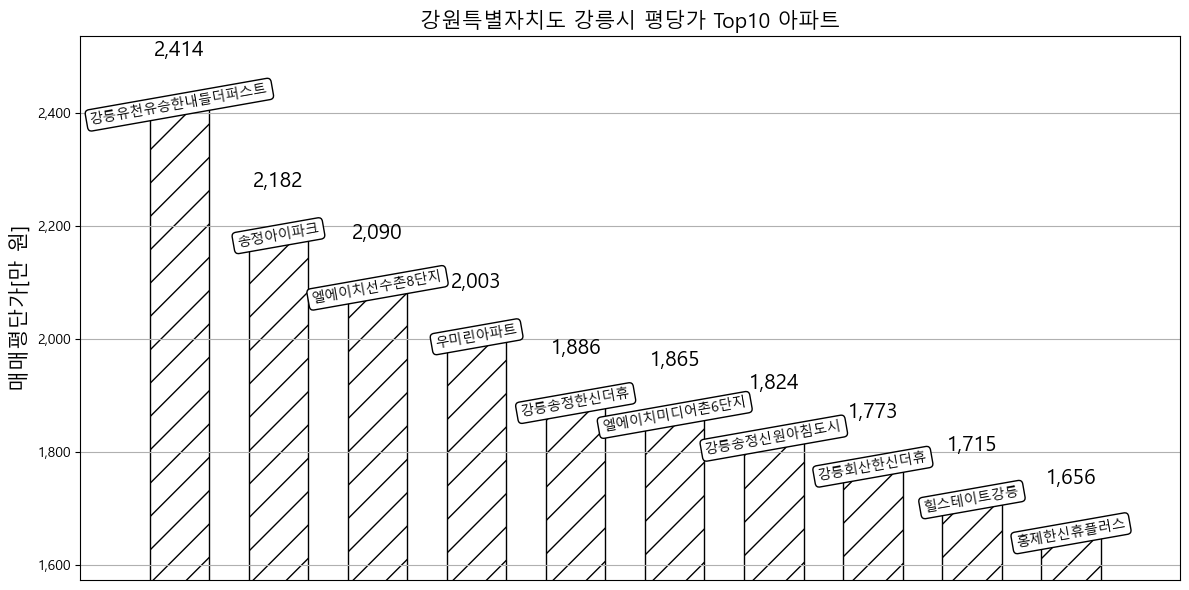

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Assuming you have already defined the 'df_place' DataFrame and 'loc' variable

# Define a function to format numbers with commas for annotations
def comma_format(x, pos):
    return '{:,.0f}'.format(x)

# Group by '아파트' and calculate the mean of '매매평당가[만 원]'
df_place_price = pd.DataFrame(df_place.groupby('아파트')['매매평당가[만 원]'].mean())

# Reset the index to convert the groupby result to a DataFrame
df_place_price.reset_index(inplace=True)

# Sort by '매매평당가[만 원]' in descending order and select the top 10 rows
df_place_price_top = df_place_price.sort_values('매매평당가[만 원]', ascending=False).head(10)

# Create a list of top 10 '아파트' values and their corresponding '매매평당가[만 원]'
top_list = df_place_price_top['아파트'].values.tolist()
top_prices = df_place_price_top['매매평당가[만 원]'].values.tolist()

# Set up the figure and axis objects
fig, axs = plt.subplots(nrows=1, figsize=(12, 6))

# Use bar plot to plot the bars with slash pattern
axs.bar(top_list, top_prices, hatch='/', edgecolor='black', color='white',  width=0.6)

# Adjust the y-axis limits to add some padding
upper_y = df_place_price_top['매매평당가[만 원]'].max() * 1.05
lower_y = df_place_price_top['매매평당가[만 원]'].min() * 0.95
axs.set_ylim(lower_y, upper_y)

# Add labels above each bar
for i, (index, row) in enumerate(df_place_price_top.iterrows()):
    axs.annotate(comma_format(row['매매평당가[만 원]'], i), xy=(i, row['매매평당가[만 원]']),
                 xytext=(i, row['매매평당가[만 원]'] + (upper_y-lower_y)/10), ha='center', va='center', fontsize=15)


# Add annotations for each bar with rotation of 15 degrees and a box around the text
for i in range(len(top_list)):
    axs.text(top_list[i], top_prices[i], top_list[i], ha='center', va='center', rotation=10,
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))


axs.yaxis.set_major_formatter(ticker.FuncFormatter(comma_format))

axs.set_xlabel('')
axs.set_xticks([])
axs.set_ylabel('매매평단가[만 원]', fontsize=15)
axs.set_title(f'{loc} 평당가 Top10 아파트', fontsize=15)

# Add extra space on both ends of the x-axis
axs.set_xlim(left=-1, right=len(top_list) + 0.1)

# Show the plot
plt.grid()
plt.tight_layout()
plt.show()


In [80]:
# Merge dataframe
merge_df = pd.merge(df_place_price_top, df_place, how='left', on='아파트')

# filter the dataframe based on the list
merge_df.drop_duplicates(subset='아파트', inplace=True)
merge_df.reset_index(inplace=True)

# concatenate Name and Age into a new column called 'Name_Age'
merge_df['법정지번'] = merge_df.apply(lambda row: row['법정동'] + ' ' + str(row['지번']), axis=1)

pd.DataFrame(merge_df[['아파트', 'ADRES', '매매평당가[만 원]_x']])


,아파트,ADRES,매매평당가[만 원]_x
0,강릉유천유승한내들더퍼스트,강원도 강릉시 유천동 781,2414.500000
1,송정아이파크,강원도 강릉시 송정동 1064,2182.481481
2,엘에이치선수촌8단지,강원도 강릉시 유천동 778,2090.129032
3,우미린아파트,강원도 강릉시 홍제동 1037,2003.473684
4,강릉송정한신더휴,강원도 강릉시 송정동 1063,1886.071429
5,엘에이치미디어촌6단지,강원도 강릉시 홍제동 1044,1865.054545
6,강릉송정신원아침도시,강원도 강릉시 송정동 1065,1823.928571
7,강릉회산한신더휴,강원도 강릉시 회산동 610,1773.333333
8,힐스테이트강릉,강원도 강릉시 회산동 130,1715.208333
9,홍제한신휴플러스,강원도 강릉시 홍제동 1055,1655.529412


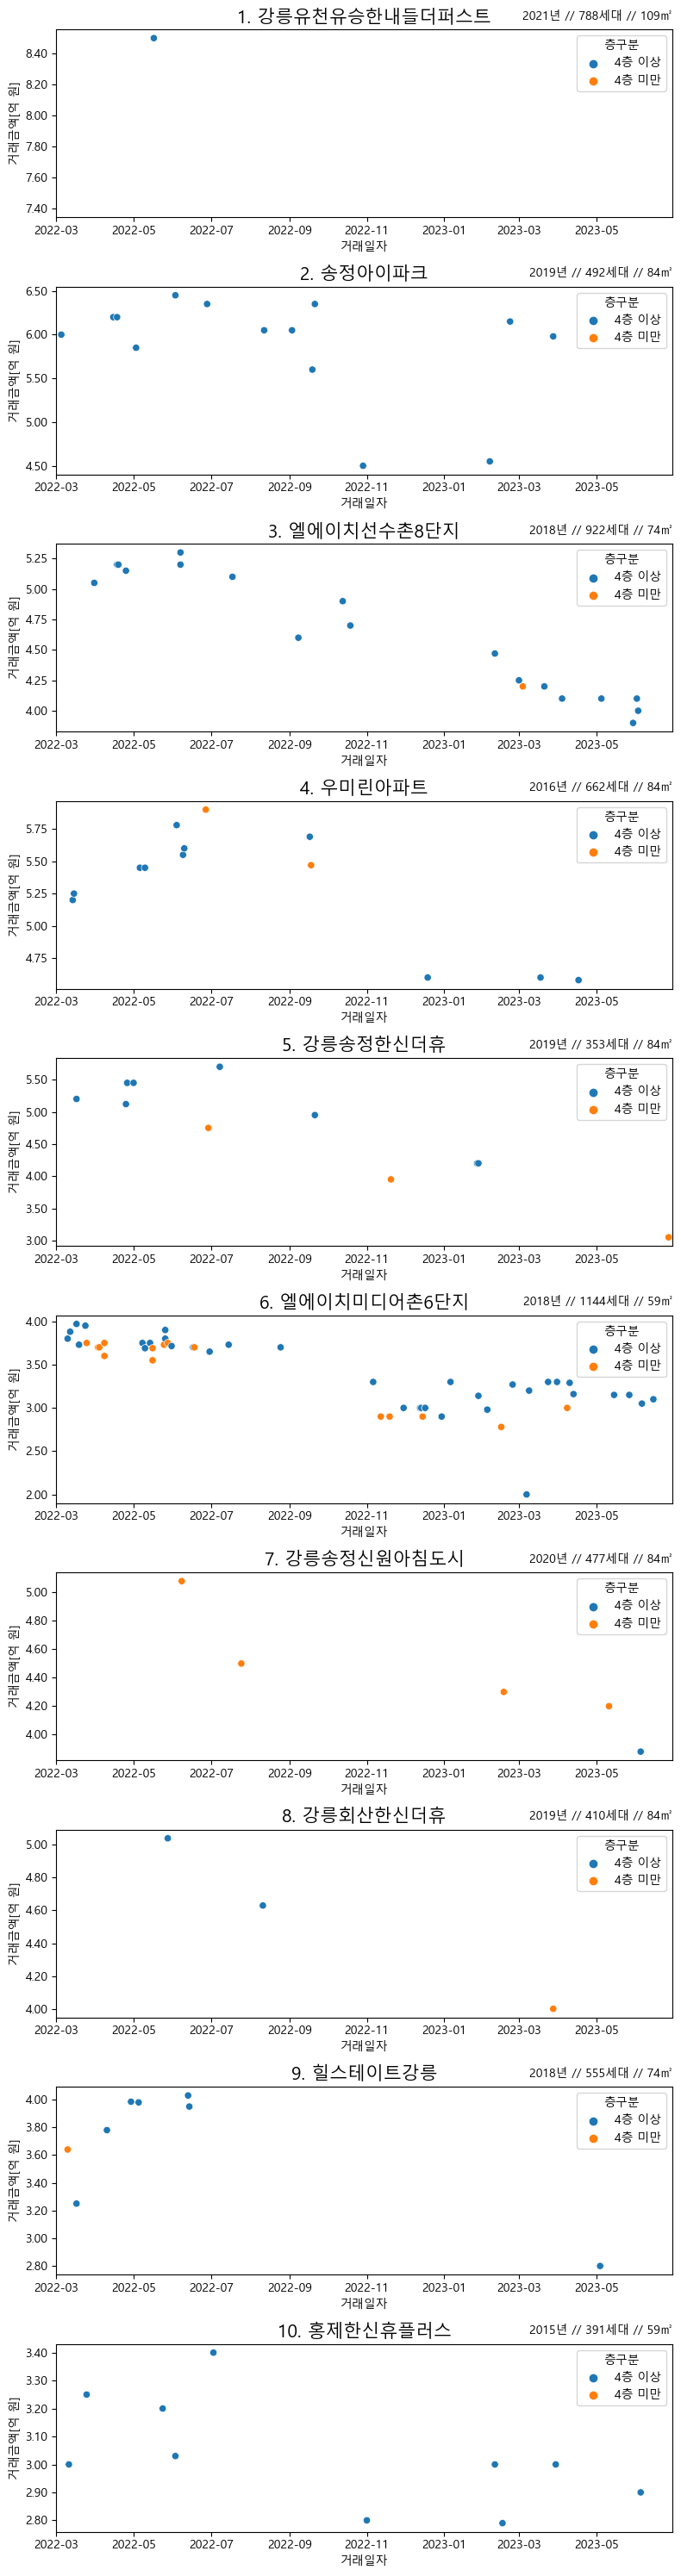

In [87]:
import matplotlib.ticker as ticker

fig, axs = plt.subplots(nrows=len(top_list), figsize=(8, len(top_list)*3))
# loop through the columns and plot each one
for i, col in enumerate(top_list):
    df_top = df_place[df_place['아파트'] == col]
    df_top.loc[df_top['아파트']== '더샵원주센트럴파크1단지', '건축년도'] = 2021
    area = df_top['전용면적(소수점제외)'].value_counts().index[0]
    year = df_top['건축년도'].value_counts().index[0].astype(int)
    UNIT_CNT = df_top['UNIT_CNT'].value_counts().index[0]
    sns.scatterplot(x='거래일자', y='거래금액[억 원]', data  = df_top[df_top['전용면적(소수점제외)'] == area]
                    , hue='층구분', hue_order=['4층 이상', '4층 미만'], ax=axs[i])
    axs[i].set_title(f'{i+1}. {col}', fontsize = 15)
    axs[i].annotate(f'{year}년 // {UNIT_CNT}세대 // {area}㎡', xy=(1,1.1), xycoords='axes fraction', ha='right', va='top')
    axs[i].set_xlim(datetime(2022, 3, 1), datetime(2023, 6,30))
    axs[i].yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

# show the plots
plt.tight_layout()
plt.show()

In [89]:
#PPT 카맵 위치검색

import pyautogui as pg
import pyperclip

import os

folder_name = './capture/'+merge_df['법정동명'][0]

if not os.path.exists(folder_name):
    os.mkdir(folder_name)
    print(f"Folder '{folder_name}' created successfully!")
else:
    print(f"Folder '{folder_name}' already exists!")


#집에서 듀얼모니터 쓸 때
pg.click(134, 156, duration=.2)


for i, text in enumerate(merge_df['ADRES']):
    pyperclip.copy(text)
    pg.click(134, 156, duration=.2)
    pg.hotkey('ctrl', 'a')
    pg.hotkey('ctrl', 'v')
    pg.press('enter')
    pg.moveTo(1130, 560, duration=.3)
    pg.scroll(-100)
    pg.moveTo(1130, 560, duration=.1)
    pg.scroll(-100)
    pg.moveTo(1130, 560, duration=.1)
    pg.scroll(-100)
    pg.moveTo(1130, 560, duration=1)
    pg.screenshot('./capture/'+ merge_df['법정동명'][0] +'/'+str(i)+' '+merge_df['아파트'][i] +'.png'
                  , region=(400, 80, 1500, 920))

Folder './capture/강원특별자치도 강릉시' already exists!


In [91]:
#PPT 글만들기

import pyautogui as pg
import pyperclip

#태크달기(집에서 듀얼모니터 쓸 때)
pg.click(325, 180, duration=.5)    
# pg.click(1560,455, duration=.3)

for i, text in enumerate(top_list):
    pyperclip.copy(text)
    pg.click(325, 180, duration=.1)
    pg.click(325, 180 +70*(i+1), duration=.1)
    pg.press(f'{i+1}')
    pg.press('.')
    pg.press('spacebar')
    pg.hotkey('ctrl', 'v')

In [90]:
top_list

['강릉유천유승한내들더퍼스트',
 '송정아이파크',
 '엘에이치선수촌8단지',
 '우미린아파트',
 '강릉송정한신더휴',
 '엘에이치미디어촌6단지',
 '강릉송정신원아침도시',
 '강릉회산한신더휴',
 '힐스테이트강릉',
 '홍제한신휴플러스']

In [11]:
import pandas as pd
import statsmodels.api as sm

In [19]:
dta = sm.datasets.macrodata.load_pandas().data
index = pd.period_range('1959Q1', '2009Q3', freq='Q')
dta.set_index(index, inplace=True)

In [21]:
dta.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [13]:
cycle, trend = sm.tsa.filters.hpfilter(dta.realgdp, 1600)
gdp_decomp = dta[['realgdp']]
gdp_decomp["cycle"] = cycle
gdp_decomp["trend"] = trend

In [26]:
df_jeonse_price_ratio[df_jeonse_price_ratio['지역명']=='대전광역시']['전세가격비율']

1331    67.996500
1332    68.719500
1333    67.838900
1334    68.113300
1335    68.458300
          ...    
1447    66.321233
1448    68.903343
1449    68.708090
1450    68.444439
1451    68.218775
Name: 전세가격비율, Length: 121, dtype: float64

In [34]:
df_test = df_jeonse_price_ratio[df_jeonse_price_ratio['지역명']=='대전광역시']

In [35]:
cycle, trend = sm.tsa.filters.hpfilter(df_test['전세가격비율'], 1600)
gdp_decomp = df_test[['전세가격비율']]
gdp_decomp["cycle"] = cycle
gdp_decomp["trend"] = trend

In [36]:
gdp_decomp

,전세가격비율,cycle,trend
1331,67.996500,-0.288568,68.285068
1332,68.719500,0.248149,68.471351
1333,67.838900,-0.818554,68.657454
1334,68.113300,-0.730050,68.843350
1335,68.458300,-0.570205,69.028505
...,...,...,...
1447,66.321233,-0.534625,66.855858
1448,68.903343,1.884862,67.018481
1449,68.708090,1.523360,67.184730
1450,68.444439,1.091905,67.352534


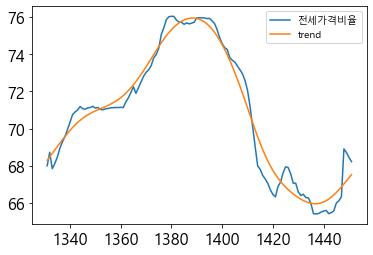

In [39]:
fig, ax = plt.subplots()
gdp_decomp[["전세가격비율", "trend"]].plot(ax=ax,fontsize=16)
plt.show()

In [71]:
 pg.click(134, 156, duration=.1)

In [1239]:
from PublicDataReader import Kosis

# KOSIS 공유서비스 Open API 사용자 인증키
service_key = "ZGYxYzIzN2UyOTk1Nzg3ZTdlYjFjMTA0NTRlYTZlYzY="

# 인스턴스 생성하기
api = Kosis(service_key)

### 6. 주택 순환주기
    → HP filter Python